<a href="https://colab.research.google.com/github/hikmatilloahatov/Azarbaijan-supermarkets-data-visualizations/blob/main/Yeni_Yasamal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019-yil uchun "Yeni Yasamal" supermarketidagi savdo holati


In [110]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [111]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/Yeni%20Yasamal.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,HEDIYYE CASKA JUST FOR YOU,Maishiy buyumlar,6.09,2019-06-02,False
1,BIZNES MENYU 45GR BIZNES LANC LAPSA QOVYADINA,Un mahsulotlari,0.25,2019-06-02,False
2,KONFET AVK TRYUFEL CIYELEKLI KG,Shirinliklar,10.65,2019-06-02,False
3,JAN MIKROFIBRI 60C BEZ 3EDED TEMIZLIK U,"Yuvish vositalari, tozalagichlar",1.59,2019-06-02,False
4,SARDELKA SAB SERQ KG,Kolbasa va sosiskalar,9.90,2019-06-02,False
5,CER.KISMIS MOVUZ KG,Quruq mevalar,9.60,2019-06-02,False
6,FIRIN.KETE NAXCIVAN EDED,Shirinliklar,1.00,2019-06-02,False
7,GODINY 305GR SOKOLAD QUTU ASSORTI CEREZ,Shirinliklar,6.80,2019-02-06,True
8,COREK COREKCI 450GR KOMBE COVDARLI,Non,0.50,2019-02-06,True
9,QARASIRE 0.75ML SERAB KEMSIRIN,Vinolar,3.85,2019-02-06,True


In [112]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21249 entries, 0 to 21248
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   21249 non-null  object 
 1   mahsulot_turi   21249 non-null  object 
 2   mahsulot_narhi  21249 non-null  float64
 3   sotilgan_vaqti  21249 non-null  object 
 4   bonus_karta     21249 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 684.9+ KB


In [113]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [114]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21249 entries, 0 to 21248
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   21249 non-null  object        
 1   mahsulot_turi   21249 non-null  object        
 2   mahsulot_narhi  21249 non-null  float64       
 3   sotilgan_vaqti  21249 non-null  datetime64[ns]
 4   bonus_karta     21249 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 684.9+ KB


In [115]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2061
1867
2198
2094
2023
2364
2142
2001
2171
2314
14
0


In [116]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2061
1867
2198
2094
2023
2364
2142
2001
2171
2314
0
0


In [90]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,IYNE DEST 12-LI PAKE,To'qimachilik,0.45,2019-08-16,True
1,ATENA 500GR BEYAZ PENDIR PL/Q,Pishloqlar,4.65,2019-08-16,True
2,RASIMOGLU 600GR DUSBERE PAKET,Un mahsulotlari,7.70,2019-08-16,True
3,NAS MOLOCNIK 200GR KRESTYANSKOYE KERE YAGI 72.6%,Yog'lar,3.20,2019-08-16,True
4,PANASONIC 4AD BATAREYKA SIZE S LR03APB/4BP,Batareya,4.75,2019-08-16,True
...,...,...,...,...,...
20819,SAM ISIQLI,Bayram uchun aksessuarlar,0.90,2019-08-09,False
20820,DOMIK V DEREVNE 950ML SUD 1.5% T/P,Sut,2.21,2019-08-09,False
20821,ATENA 500GR KEND QATIGI 1.5%,Qatiq,1.27,2019-01-02,False
20822,AZOVSKAYA 250GR XALVA PODSOLNECNAYA,Shirinliklar,1.05,2019-01-02,False


In [117]:
#9 2019-yilda "Yeni Yasamal" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4944
Maishiy buyumlar,1175
"Yuvish vositalari, tozalagichlar",1060
Mevali sharbatlar,980
Idish-tovoq,812
...,...
Suzma,24
Tayyor ovqatlar,12
Shampan,12
Muzlatilgan mahsulotlar,8


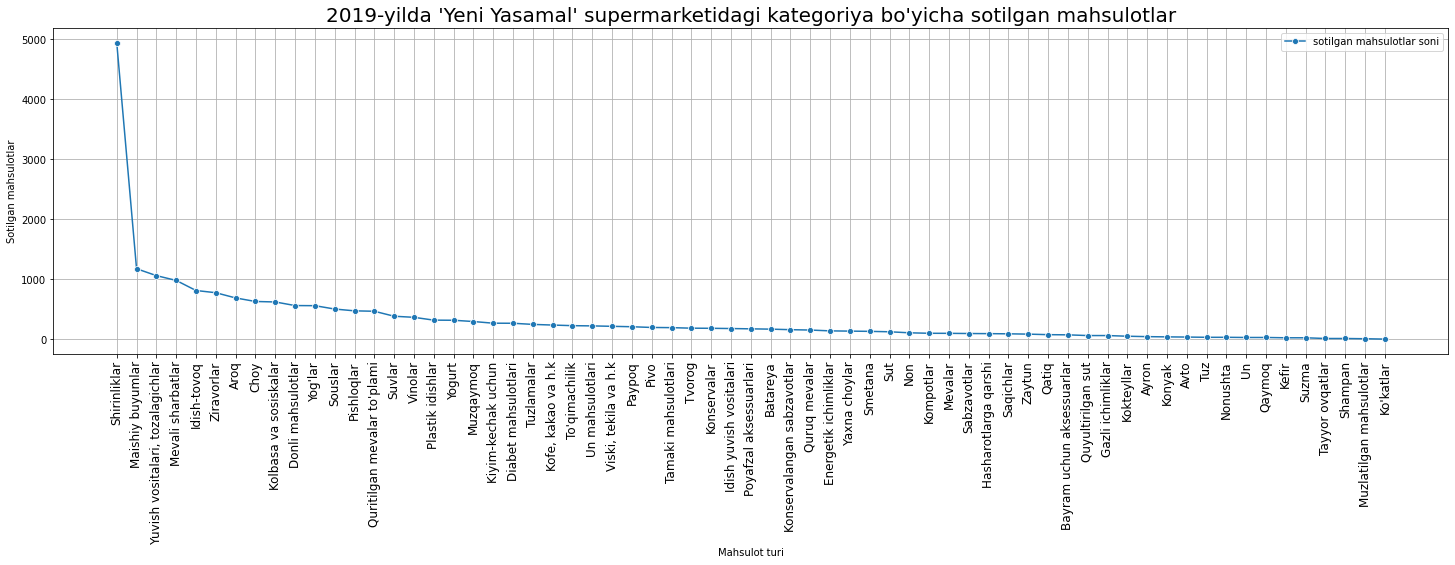

In [118]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Yeni Yasamal' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [119]:
#10 2019-yilda "Yeni Yasamal" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10489.56
Avto,218.92
Ayron,29.26
Batareya,629.64
Bayram uchun aksessuarlar,209.50
...,...
Yog'lar,4709.88
Yogurt,378.82


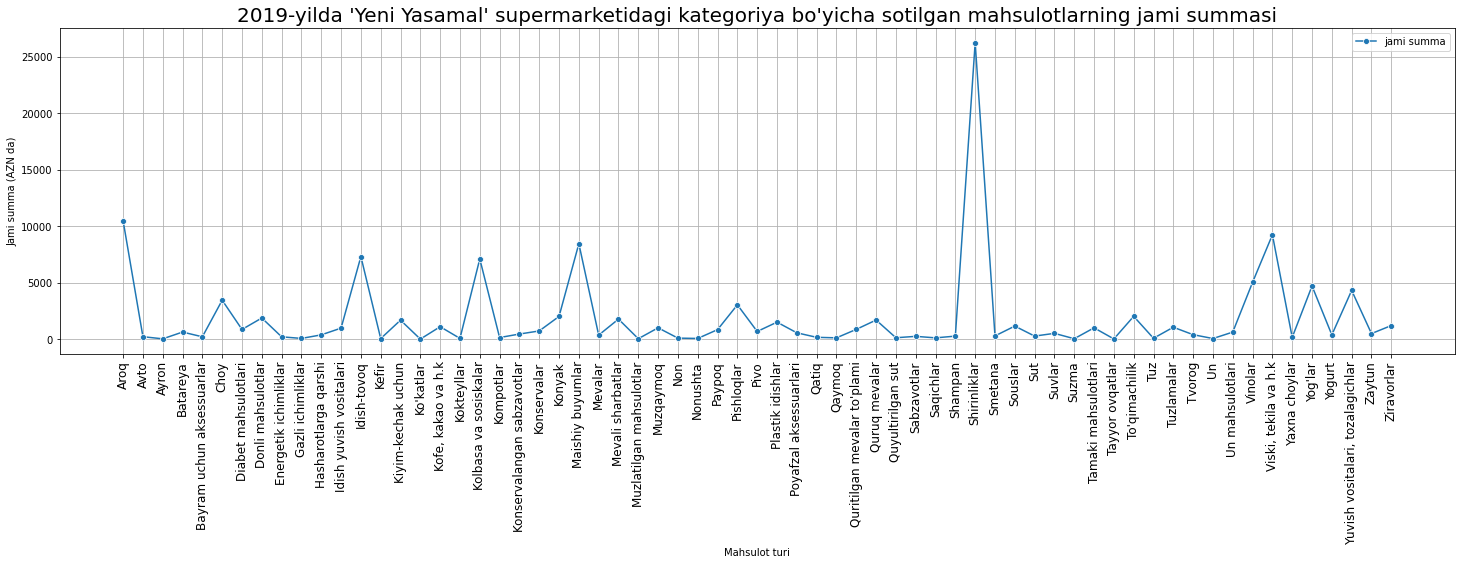

In [120]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Yeni Yasamal' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [121]:
#11 2019-yilda "Yeni Yasamal" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10664,10571


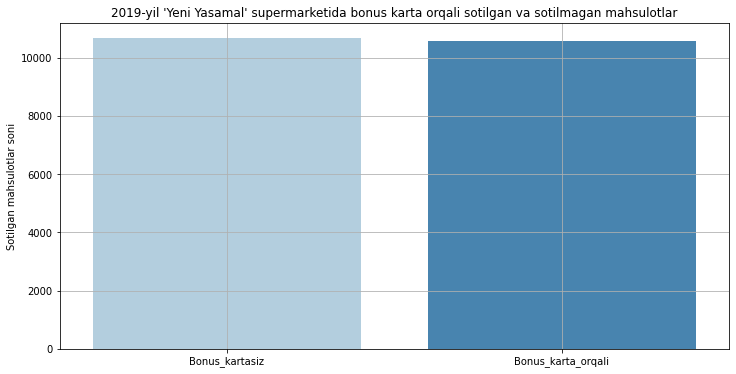

In [122]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Yeni Yasamal' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [123]:
#12 2019-yilda "Yeni Yasamal" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2061
Fevral,1867
Mart,2198
Aprel,2094
May,2023
Iyun,2364
Iyul,2142
Avgust,2001
Sentabr,2171
Oktabr,2314


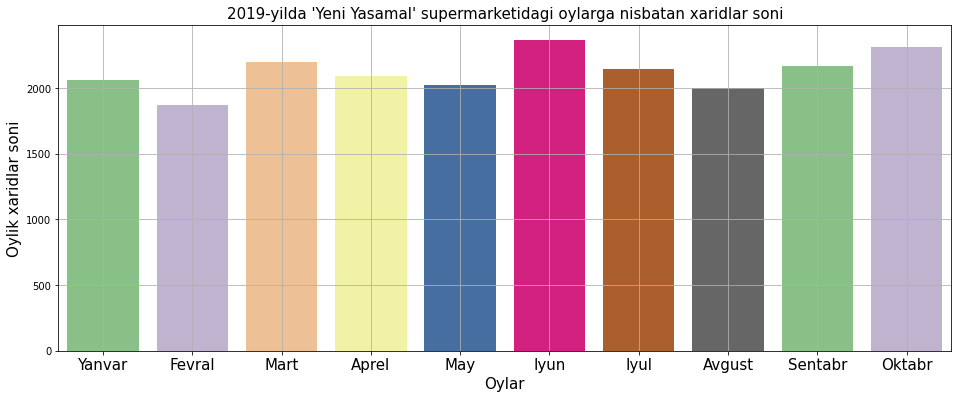

In [124]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Yeni Yasamal' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [125]:
#13 2019-yilda "Yeni Yasamal" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2993
Seshanba,3000
Chorshanba,3206
Payshanba,2907
Juma,2947
Shanba,3033
Yakshanba,3149


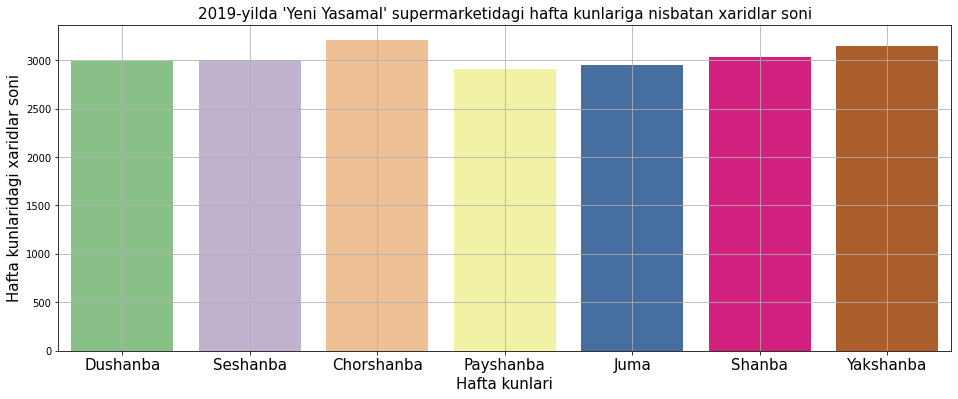

In [126]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Yeni Yasamal' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [127]:
#14 2019-yilda "Yeni Yasamal" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,706
2,655
3,730
4,762
5,743
6,688
7,628
8,747
9,648
10,616


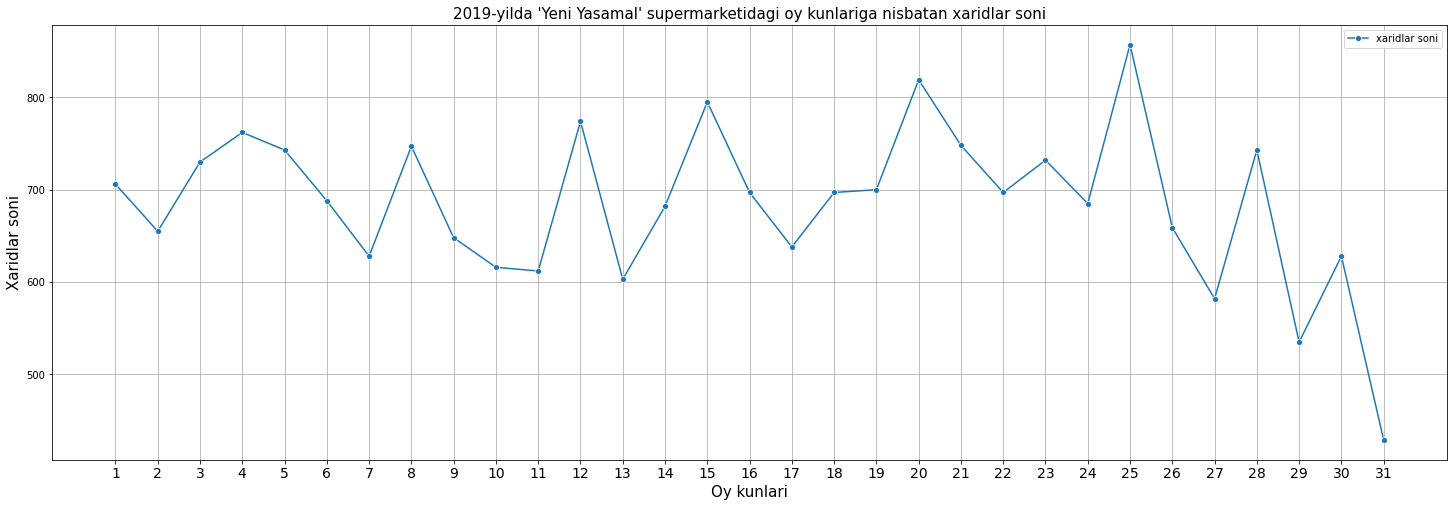

In [128]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Yeni Yasamal' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [129]:
#15 2019-yil 'Yeni Yasamal' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [130]:
len(oy_sanalari)

310

In [131]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [132]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [133]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,76,58,55,62,71,58,59,49,105,67,52,88,10,67,92,69,96,64,80,77,68,53,47,42,94,80,44,73,45,83,77
Fevral,59,57,66,50,77,63,71,100,58,70,35,55,66,60,71,58,84,73,53,71,58,50,68,99,69,72,33,121,0,0,0
Mart,36,64,92,75,93,57,52,60,63,49,58,77,60,108,54,75,59,98,59,56,72,109,71,57,123,62,61,68,75,102,53
Aprel,95,73,104,47,55,62,34,29,48,71,41,62,81,66,87,84,89,109,45,88,86,91,109,83,69,65,52,77,43,49,0
May,88,45,58,99,67,66,89,49,50,57,81,86,33,38,56,34,56,59,62,80,57,94,63,91,48,58,62,72,69,72,84
Iyun,64,104,96,77,86,81,42,127,87,42,82,62,59,78,102,99,29,62,75,98,80,57,100,76,137,54,79,107,81,41,0
Iyul,64,63,72,52,105,57,90,97,68,82,62,100,42,80,82,27,67,26,29,78,73,56,39,76,104,61,71,74,79,92,74
Avgust,85,48,81,93,44,74,67,67,37,62,78,88,85,54,41,84,47,60,135,83,97,56,82,47,47,40,45,47,33,46,48
Sentabr,59,74,49,117,61,83,73,105,38,68,65,73,96,41,114,61,71,75,83,79,64,83,76,53,103,71,49,44,55,88,0
Oktabr,80,69,57,90,84,87,51,64,94,48,58,83,71,90,96,106,40,71,79,109,93,48,77,61,63,96,86,60,55,55,93


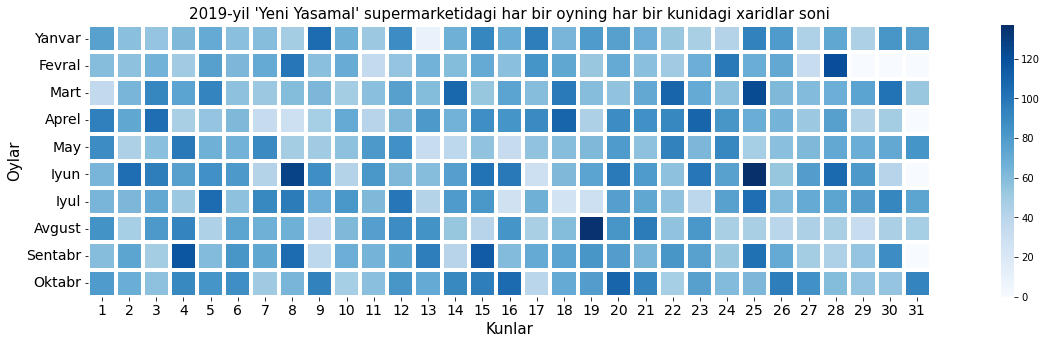

In [134]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Yeni Yasamal' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

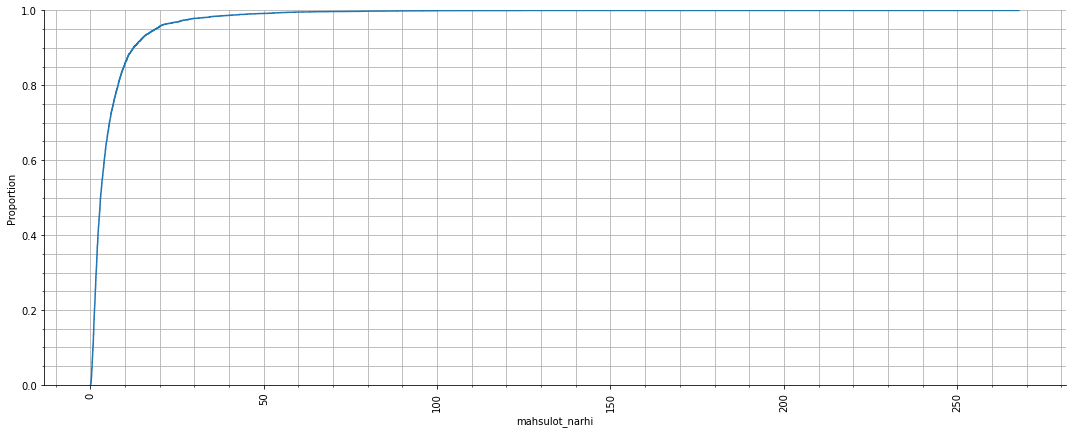

In [135]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()